# Types of Missing Data

* MCAR (Missing Completely At Random): No pattern to missingness
* MAR (Missing At Random): Missingness depends on other observed data
* MNAR (Missing Not At Random): Missingness depends on unobserved data

## 🔍 Detecting Missing Values

In [2]:
import pandas as pd
import numpy as np

# Creating data with missing values
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, np.nan],
    'C': [1, 2, 3, np.nan, 5],
    'D': ['a', None, 'c', 'd', 'e']
})

print(df)
#      A    B    C     D
# 0  1.0  NaN  1.0     a
# 1  2.0  2.0  2.0  None
# 2  NaN  3.0  3.0     c
# 3  4.0  4.0  NaN     d
# 4  5.0  NaN  5.0     e

     A    B    C     D
0  1.0  NaN  1.0     a
1  2.0  2.0  2.0  None
2  NaN  3.0  3.0     c
3  4.0  4.0  NaN     d
4  5.0  NaN  5.0     e


## Detection Methods

In [3]:
# Check for missing values (element-wise)
print(df.isna())        # or df.isnull()
print(df.notna())       # or df.notnull()

# Count missing values per column
print(df.isna().sum())
# Output:
# A    1
# B    2
# C    1
# D    1

# Count missing values per row
print(df.isna().sum(axis=1))

# Total missing values in DataFrame
print(df.isna().sum().sum())

# Percentage of missing values
print(df.isna().sum() / len(df) * 100)

       A      B      C      D
0  False   True  False  False
1  False  False  False   True
2   True  False  False  False
3  False  False   True  False
4  False   True  False  False
       A      B      C      D
0   True  False   True   True
1   True   True   True  False
2  False   True   True   True
3   True   True  False   True
4   True  False   True   True
A    1
B    2
C    1
D    1
dtype: int64
0    1
1    1
2    1
3    1
4    1
dtype: int64
5
A    20.0
B    40.0
C    20.0
D    20.0
dtype: float64


## Visualizing Missing Data

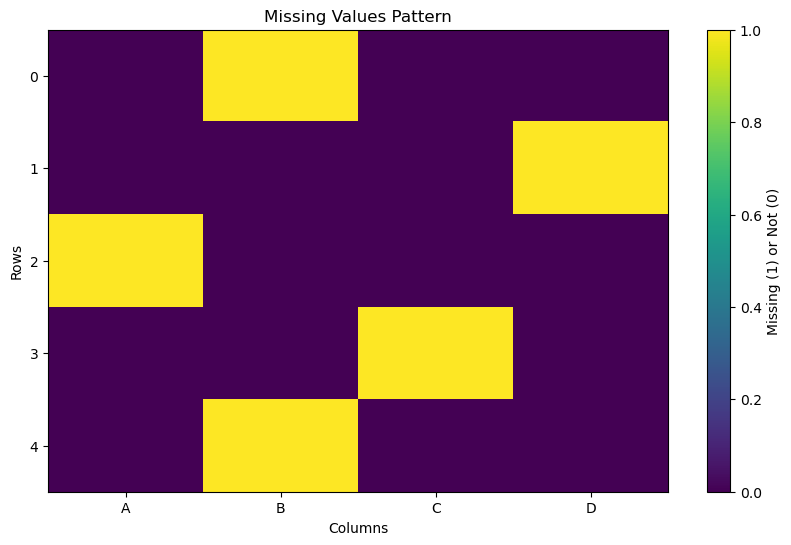

   Missing_Count  Percent
B              2     40.0
A              1     20.0
C              1     20.0
D              1     20.0


In [5]:
# Create a missing value heatmap (requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(df.isna(), cmap='viridis', aspect='auto')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Pattern')
plt.xticks(range(len(df.columns)), df.columns)
plt.colorbar(label='Missing (1) or Not (0)')
plt.show()

# Summary of missing data
def missing_summary(df):
    missing = df.isna().sum()
    percent = (missing / len(df)) * 100
    summary = pd.DataFrame({
        'Missing_Count': missing,
        'Percent': percent
    })
    return summary[summary.Missing_Count > 0].sort_values('Missing_Count', ascending=False)

print(missing_summary(df))

## ❌ Dropping Missing Data

In [ ]:
# Drop Rows with Missing Values
# Drop any row with at least one missing value
df_clean = df.dropna()

# Drop rows where ALL values are missing
df_clean = df.dropna(how='all')

# Drop rows with missing values in specific columns
df_clean = df.dropna(subset=['A', 'B'])

# keeps rows with at least N non-null values
df_clean = df.dropna(thresh=3)  # At least 3 non-null values

# Modify original (be careful!)
df.dropna(inplace=True)

In [16]:
df = pd.DataFrame({
    'A': [1, np.nan, 3,6],
    'B': [2, 2, np.nan, 9],
    'C': [3, np.nan, np.nan,1],
    'D': [4,  np.nan, 4, 111]
})

print(df.dropna(thresh = 3))

     A    B    C      D
0  1.0  2.0  3.0    4.0
3  6.0  9.0  1.0  111.0


## Drop Columns with Missing Values

In [8]:
# Drop any column with at least one missing value
df_clean = df.dropna(axis=1)

# Drop columns where ALL values are missing
df_clean = df.dropna(axis=1, how='all')

# Drop columns with more than 50% missing
threshold = len(df) * 0.5
df_clean = df.dropna(axis=1, thresh=threshold)

## ✏️ Filling Missing Data

In [9]:
# Fill all missing values with 0
df_filled = df.fillna(0)

# Fill specific column with specific value
df['A'] = df['A'].fillna(0)

# Fill different columns with different values
df_filled = df.fillna({'A': 0, 'B': -1, 'C': 999})

# Fill with string
df['D'] = df['D'].fillna('Unknown')

## Forword and backword fill

In [17]:
# Forward fill (use previous value)
print(df)
print('---------')
df_filled = df.ffill()
print(df_filled)
df_filled = df.bfill()
print(df_filled)

     A    B    C      D
0  1.0  2.0  3.0    4.0
1  NaN  2.0  NaN    NaN
2  3.0  NaN  NaN    4.0
3  6.0  9.0  1.0  111.0
---------
     A    B    C      D
0  1.0  2.0  3.0    4.0
1  1.0  2.0  3.0    4.0
2  3.0  2.0  3.0    4.0
3  6.0  9.0  1.0  111.0
     A    B    C      D
0  1.0  2.0  3.0    4.0
1  3.0  2.0  1.0    4.0
2  3.0  9.0  1.0    4.0
3  6.0  9.0  1.0  111.0


## Interpolation

In [ ]:
# Linear interpolation
df['A'] = df['A'].interpolate()

# Polynomial interpolation
df['A'] = df['A'].interpolate(method='polynomial', order=2)

# Time-based interpolation (for time series)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df['Value'] = df['Value'].interpolate(method='time')

# Nearest neighbor interpolation
df['A'] = df['A'].interpolate(method='nearest')

## Replace Specific Values with NaN

In [18]:
# Replace 0 with NaN
df = df.replace(0, np.nan)

# Replace multiple values
df = df.replace([0, -999, 'N/A'], np.nan)

# Replace using dictionary
df = df.replace({'A': {0: np.nan}, 'B': {-999: np.nan}})

## 🎯 Practice Exercises
### Exercise 1: Sales Data
#### Create a DataFrame with 10 rows of sales data:

* Date, Product, Quantity, Price, Region
* Introduce 10-20% missing values randomly

#### Tasks:

* Identify columns with missing values
* Calculate percentage missing per column
* Drop rows where Quantity or Price is missing
* Fill Region with mode
* Interpolate missing Prices
* Create a 'Complete' flag column

In [46]:
import pandas as pd
import numpy as np

# np.random.seed(42)

# Create data
dates = pd.date_range('2024-01-01', periods=10)
products = np.random.choice(['Laptop', 'Phone', 'Tablet', 'Monitor'], 10)
quantity = np.random.randint(1, 10, 10)
price = np.random.uniform(100, 1000, 10)
region = np.random.choice(['North', 'South', 'East', 'West'], 10)

df = pd.DataFrame({
    'Date': dates,
    'Product': products,
    'Quantity': quantity,
    'Price': price,
    'Region': region
})
for col in ['Quantity', 'Price', 'Region']:
    mask = np.random.rand(10) < 0.15
    df.loc[mask, col] = np.nan
print(df)
df.isna().sum()

        Date  Product  Quantity       Price Region
0 2024-01-01  Monitor       7.0  106.256917  North
1 2024-01-02  Monitor       9.0  559.672572    NaN
2 2024-01-03  Monitor       NaN  475.669903  North
3 2024-01-04  Monitor       1.0  299.897029  South
4 2024-01-05  Monitor       1.0  207.878831   West
5 2024-01-06    Phone       NaN  403.853654    NaN
6 2024-01-07    Phone       9.0  948.618734  South
7 2024-01-08   Tablet       4.0  390.882639   East
8 2024-01-09  Monitor       9.0  566.911560    NaN
9 2024-01-10    Phone       NaN  732.717063   East


Date        0
Product     0
Quantity    3
Price       0
Region      3
dtype: int64

In [27]:
df.isna().sum() / len(df)

Date        0.0
Product     0.0
Quantity    0.2
Price       0.3
Region      0.0
dtype: float64

In [30]:
(df.isna().mean() ).round(2)

Date        0.0
Product     0.0
Quantity    0.2
Price       0.3
Region      0.0
dtype: float64

In [34]:
df.dropna(subset=['Price','Quantity'])

,Date,Product,Quantity,Price,Region
0,2024-01-01,Tablet,3.0,972.918867,South
2,2024-01-03,Laptop,8.0,291.105200,West
5,2024-01-06,Monitor,8.0,373.818019,East
7,2024-01-08,Laptop,3.0,488.750517,South
8,2024-01-09,Tablet,6.0,362.106226,East
9,2024-01-10,Phone,5.0,650.667605,South


In [51]:
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
df

,Date,Product,Quantity,Price,Region
0,2024-01-01,Monitor,7.0,106.256917,North
1,2024-01-02,Monitor,9.0,559.672572,North
2,2024-01-03,Monitor,NaN,475.669903,North
3,2024-01-04,Monitor,1.0,299.897029,South
4,2024-01-05,Monitor,1.0,207.878831,West
5,2024-01-06,Phone,NaN,403.853654,North
6,2024-01-07,Phone,9.0,948.618734,South
7,2024-01-08,Tablet,4.0,390.882639,East
8,2024-01-09,Monitor,9.0,566.911560,North
9,2024-01-10,Phone,NaN,732.717063,East
